# Read the processed titanic dataframe.

Store it in a dataframe called `titanic_train` and `titanic_test`.

In [1]:
import pandas as pd

In [2]:
# your code here
titanic_train = pd.read_csv('titanic_train.csv')
titanic_test = pd.read_csv('titanic_test.csv')

# Train and Test

You have separated the original dataset into train and test. In fact, what you were effectively doing was hiding some part of your data to analyse your scores afterwards.

# First Step: start simple

You will select two variables to create the predictive variables for your problem - store the features representing the `Sex` and `Age` in dataframes called `X_train` and `X_test`. (maybe the `sex` variable is written as `Sex_male` for example, if you dummyfied it)

Also store the variable `Survived` into pandas series called `y_train` and `y_test`. This is your target variable. 

In [3]:
# your code here
X_train = titanic_train[['Sex_male', 'Age']]
X_test = titanic_test[['Sex_male', 'Age']]
y_train = titanic_train['y_train']
y_test = titanic_test['y_test']

# Logistic regression for classification

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [4]:
from sklearn.linear_model import LogisticRegression

## Use the LogisticRegression classifier to train your model on your train set.

In [5]:
# your code here
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Use your logistic regression model to generate a prediction for your test dataset. 

Create a variable called `y_pred` to put the results of the model. Try to understand what exactly the `.predict()` method is doing. 

In [6]:
# your code here
y_pred = model.predict(X_train)

## Evaluating the results

Use your model's method called `score` to evaluate the results on your test set. 

In [7]:
# your code here
model.score(X_train, y_train)

0.7790262172284644

## To think:

- What does the `.score()` method calculates?
- Is this metric appropriate for this use case? Why?

In [8]:
# your answer here
"""
O método serve para sabermos se o nosso 
modelo será efetivo ao receber um dado que
ele nunca viu na vida.
"""

'\nO método serve para sabermos se o nosso \nmodelo será efetivo ao receber um dado que\nele nunca viu na vida.\n'

## Confusion matrix

Print the confusion matrix for the results obtained.

_hint: You can use the `pd.crosstab()` or the_ `sklearn.metrics.confusion_matrix` _method_ 

In [9]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

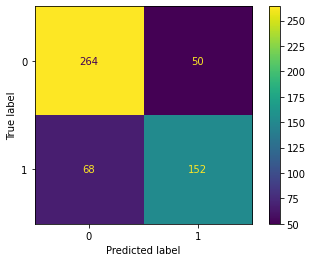

In [10]:
# your code here
plot_confusion_matrix(model, X_train, y_train, values_format='.0f')
plt.grid(False)

## Precision-recall scores

## Calculate the precision and recall scores for the test set. 

_hint: Use the methods from sklearn.metrics_ 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [11]:
from sklearn.metrics import precision_score, recall_score

In [12]:
# your code here
precision_score(y_train, model.predict(X_train))

0.7524752475247525

In [13]:
recall_score(y_train, model.predict(X_train))

0.6909090909090909

### Questions:

- What do these precision and recall scores mean? Explain precision and recall with your own words.
- Are these the precision and recall scores for which threshold? Explain what a threshold mean with your own words.

In [14]:
# your code here
"""
A taxa de precisão significa o quanto você irá
acertar caso siga o modelo. Já a taxa de captura
mostra quanto o seu modelo conseguiu capturar o 
objetivo.
"""

'\nA taxa de precisão significa o quanto você irá\nacertar caso siga o modelo. Já a taxa de captura\nmostra quanto o seu modelo conseguiu capturar o \nobjetivo.\n'

## Compare a measure of accuracy, recall and precision for both train and test sets. 

You've calculated the metrics for the test dataset. Now, calculate the metrics for the train dataset and compare the results. What do you observe? Based on what you see, do you think your model has overfitted? 

In [15]:
model.fit(X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
model.score(X_test,y_test)

0.7808988764044944

In [17]:
precision_score(y_test, model.predict(X_test))

0.7543859649122807

In [18]:
recall_score(y_test, model.predict(X_test))

0.6323529411764706

# Non-linear Models - Trees

## Create a decision tree model using the default arguments.

In [19]:
from sklearn import tree

In [20]:
# your code here
clf = tree.DecisionTreeClassifier()

## Calculate the accuracy, precision and recall scores for both the `training set` and the `test set`.

After calculating it, compare the results. What do you observe? Do you understand what does that mean?

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
clf.score(X_train, y_train)

0.8333333333333334

In [23]:
precision_score(y_train, clf.predict(X_train))

0.8133971291866029

In [24]:
recall_score(y_train, clf.predict(X_train))

0.7727272727272727

In [25]:
clf.fit(X_test, y_test)
clf.score(X_test, y_test)

0.8932584269662921

In [26]:
precision_score(y_test, clf.predict(X_test))

0.9803921568627451

In [27]:
recall_score(y_test, clf.predict(X_test))

0.7352941176470589

## Plotting trees

Use the the method `plot_tree()` from `sklearn.tree` module to print the tree on your notebook. Play with arguments like `feature_names`, `class_names`, `proportion`, `filled`...

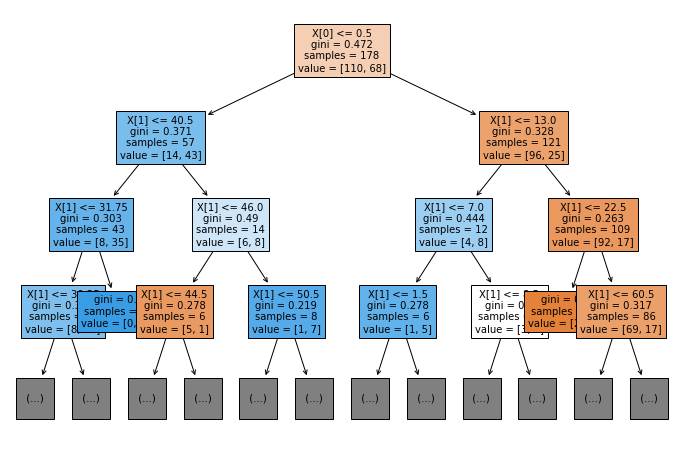

In [35]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, max_depth=3, filled=True, fontsize=10)
plt.show()

What do you think happened? Did you expect the resulting tree to have that size?

In [29]:
"""
Não, pois achava que seria menor o tamanho da árvore.
"""

'\nNão, pois achava que seria menor o tamanho da árvore.\n'

## Using the `mlxtend.plotting` module, plot the decision boundaries for the Tree classification algorithm.

Use `!pip install mlxtend --user` to install the `mlxtend` package


_hint: you have to convert the dataframes to np.array before plotting in this package_

Note: Include the labels on the plot using: 

`plt.xlabel(x_test.columns[0])`

`plt.ylabel(x_test.columns[1]);`

where x_test is your dataframe.

In [30]:
#!pip install mlxtend --user

In [54]:
from mlxtend.plotting import plot_decision_regions

C:\Users\yukar\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'Age')

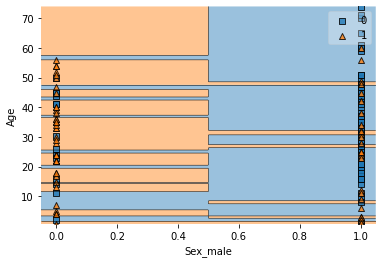

In [72]:
# your code here
x_test = X_test.to_numpy()
y_test_a = y_test.to_numpy()
plot_decision_regions(x_test, y_test_a, clf,  zoom_factor=20)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])

You should have observed a high granularity of lines cutting the drawing. What do you think those represent? What exactly do they represent from a Tree algorithm? 

In [73]:
# your answer here
"""
Podemos visualizar que o sexo masculino possui
menor taxa de sobrevivência em relação as mulheres.
E a idade de sobrevivência é bem mais 'estreita'
do que o das mulheres.
"""

"\nPodemos visualizar que o sexo masculino possui\nmenor taxa de sobrevivência em relação as mulheres.\nE a idade de sobrevivência é bem mais 'estreita'\ndo que o das mulheres.\n"

## Perform the same operation (i.e., use the `mlxtend.plotting` module to plot the decision boundary) for the Logistic Regression model you've created above.

C:\Users\yukar\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'Age')

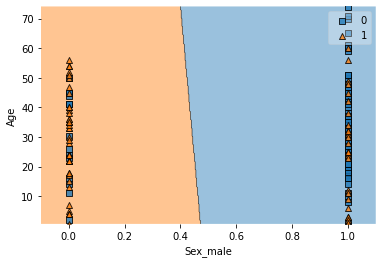

In [76]:
# your code here
plot_decision_regions(x_test, y_test_a, model, zoom_factor=10)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])

What differences do you observe from them? The variable Age is important for the logistic regression? For different values of Age, how is the decision boundary affected? Why do you think that happens? Try to remember the `titanic-exploration` lab to recall how was Age correlated with the variable `Survived` and how we've managed to see some importance there.

In [79]:
# your code here
"""
A diferença entre os dois plots está entre um mostrar 
de forma visual a quantidade dos sexos, embora a taxa
de sobrevivência do sexo masculino seja menor.
"""

'\nA diferença entre os dois plots está entre um mostrar \nde forma visual a quantidade dos sexos, embora a taxa\nde sobrevivência do sexo masculino seja menor.\n'

# Fixing the Decision Tree algorithm

As you observed, an overfit occurred when using the default values of the DecisionTreeClassifier. This happens because, by default, the Decision Tree is so complex that it manages to memorize the whole dataset despite the granularity necessary to do that. It just keeps creating splits until each observation is memorized. 

In this sense, by default, the Decision Tree algorithm is **too complex**. We will solve this problem by making the tree a bit less complex. We'll change the parameter called `max_depth` for the DecisionTreeClassifier().

Try to find a good value for `max_depth` that helps getting closer results within `train` and `test` scores.

In [98]:
# your code here
max_depth_range = list(range(1, 18))
accuracy = []
for depth in max_depth_range:
    
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)    
    score = clf.score(X_test, y_test)
    accuracy.append(score)
accuracy

[0.7808988764044944,
 0.7808988764044944,
 0.7865168539325843,
 0.7865168539325843,
 0.7921348314606742,
 0.7865168539325843,
 0.7752808988764045,
 0.7471910112359551,
 0.7471910112359551,
 0.7359550561797753,
 0.7359550561797753,
 0.7359550561797753,
 0.7359550561797753,
 0.7359550561797753,
 0.7303370786516854,
 0.7303370786516854,
 0.7303370786516854]

## Plot the resulting tree and deicision boundary. 

After choosing a good value for `max_depth`, i.e., a value that manages to get a good balance within performance and generalization

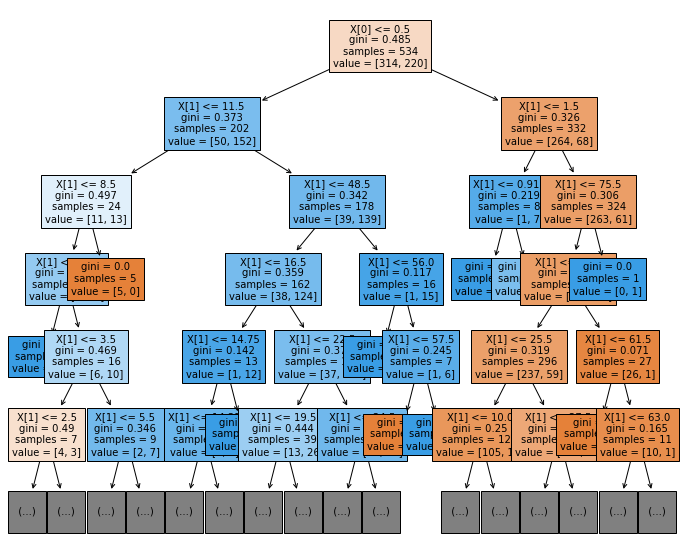

In [99]:
# your code here
plt.figure(figsize=(12,10))
tree.plot_tree(clf, max_depth=5, filled=True, fontsize=10)
plt.show()

### Question:

- Can you identify which one was the most important feature on this decision tree model?

In [106]:
X_train

,Sex_male,Age
0,0,17.0
1,1,26.0
2,0,58.0
3,1,25.0
4,0,53.0
...,...,...
529,0,25.0
530,1,32.0
531,1,27.0
532,1,44.0


In [107]:
# your answer here
""" 
A idade é o fator mais importante para a árvore de decisão.
"""

' \nA idade é o fator mais importante para a árvore de decisão.\n'

# Finally, use more variables

Try to obtain a good score for your problem. Use more variables if you wish. You can plot the tree to understand the variables.

In [108]:
# your code here
titanic_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,y_train
0,3,17.0,4,2,7.9250,0,0,1,1
1,3,26.0,0,0,7.8875,1,0,1,0
2,1,58.0,0,0,146.5208,0,0,0,1
3,1,25.0,1,0,91.0792,1,0,0,1
4,1,53.0,2,0,51.4792,0,0,1,1
...,...,...,...,...,...,...,...,...,...
529,3,25.0,1,0,7.9250,0,0,1,0
530,3,32.0,0,0,7.9250,1,0,1,0
531,1,27.0,0,0,76.7292,1,0,0,1
532,1,44.0,2,0,90.0000,1,1,0,0


In [109]:
X_train = titanic_train.drop(columns=['y_train'])
X_test = titanic_test.drop(columns=['y_test'])
y_train = titanic_train['y_train']
y_test = titanic_test['y_test']
clf = tree.DecisionTreeClassifier(max_depth = depth)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

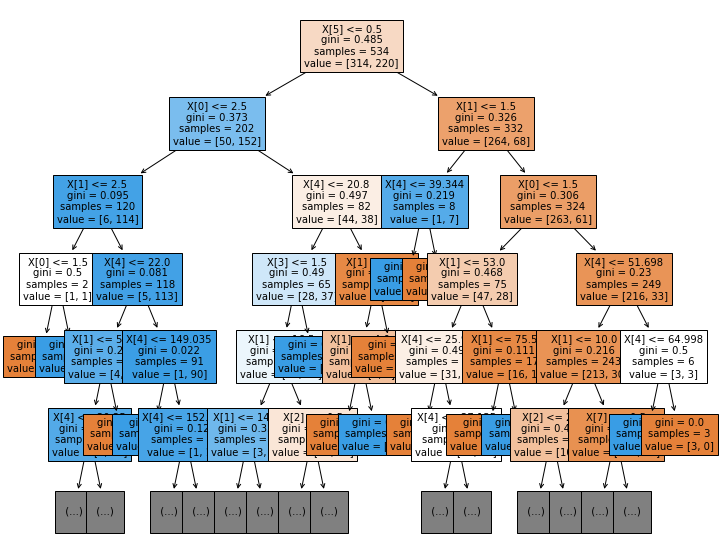

In [110]:
plt.figure(figsize=(12,10))
tree.plot_tree(clf, max_depth=5, filled=True, fontsize=10)
plt.show()